# Advanced Tutorial on Implementing parallel Apriori Algorithm

In this tutorial, we will discuss the second approach to find frequent patterns in big data using parallelApriori algorithm.



[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the parallelApriori algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the parallelApriori algorithm and pandas data frame

In [1]:
from PAMI.frequentPattern.pyspark import parallelApriori  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'transactional_T10I4D100K.csv'
seperator='\t'
mumberWorkersCount=4
minimumSupportCountList = [1000, 1500, 2000, 2500, 3000] 
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory']) 
#initialize a data frame to store the results of parallelApriori algorithm

#### Step 3: Execute the parallelApriori algorithm using a for loop

In [3]:
algorithm = 'parallelApriori'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.parallelApriori('transactional_T10I4D100K.csv', minSup=minSupCount,numWorkers=mumberWorkersCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/10/10 10:51:42 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Frequent patterns were generated successfully using Parallel Apriori algorithm


Frequent patterns were generated successfully using Parallel Apriori algorithm


Frequent patterns were generated successfully using Parallel Apriori algorithm


Frequent patterns were generated successfully using Parallel Apriori algorithm


Frequent patterns were generated successfully using Parallel Apriori algorithm


In [4]:
print(result)

         algorithm  minSup  patterns     runtime     memory
0  parallelApriori    1000       385  264.446701  130207744
1  parallelApriori    1500       237  104.576302  131133440
2  parallelApriori    2000       155   45.308732  131284992
3  parallelApriori    2500       107   22.472406  131424256
4  parallelApriori    3000        60    8.102086  131424256


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

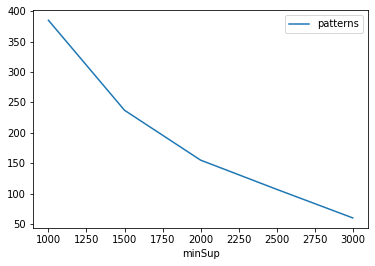

Graph for No Of Patterns is successfully generated!


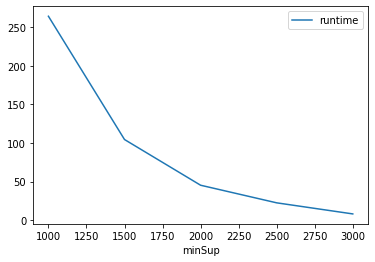

Graph for Runtime taken is successfully generated!


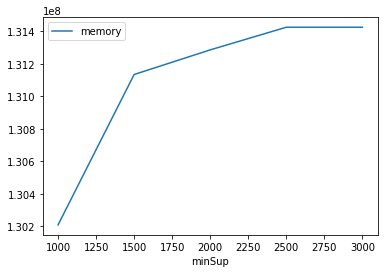

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
